In [ ]:
# Install required library - after instalation comment the line below
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.6 MB/s eta 0:00:00


In [ ]:
# Import all required libraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from category_encoders.ordinal import OrdinalEncoder   # Not suitable for our feature 'Sex'
from category_encoders.target_encoder import TargetEncoder
from category_encoders.cat_boost import CatBoostEncoder

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **1. Read and Analize datasets**

In [ ]:
# Read the dataset
abalon_data = pd.read_csv('/content/drive/MyDrive/Datasets/abalone/data.csv')
abalon_data.head(3)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9


In [ ]:
	# FEATURES DESCRIPTION:
  # Sex		nominal			M, F, and I (infant)
	# Length		continuous	mm	Longest shell measurement
	# Diameter	continuous	mm	perpendicular to length
	# Height		continuous	mm	with meat in shell
	# Whole weight	continuous	grams	whole abalone
	# Shucked weight	continuous	grams	weight of meat
	# Viscera weight	continuous	grams	gut weight (after bleeding)
	# Shell weight	continuous	grams	after being dried
	# Rings

In [ ]:
abalon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [ ]:
abalon_data.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Великий розрив значень між mean та min та/або max значеннями говорить про те що можуть бути викиди.

In [ ]:
# Generate a correlation matrix and visualize possible correlations between all columns
correlation_matrix_1 = abalon_data[abalon_data.columns[1:]].corr()
mask1 = np.triu(correlation_matrix_1)

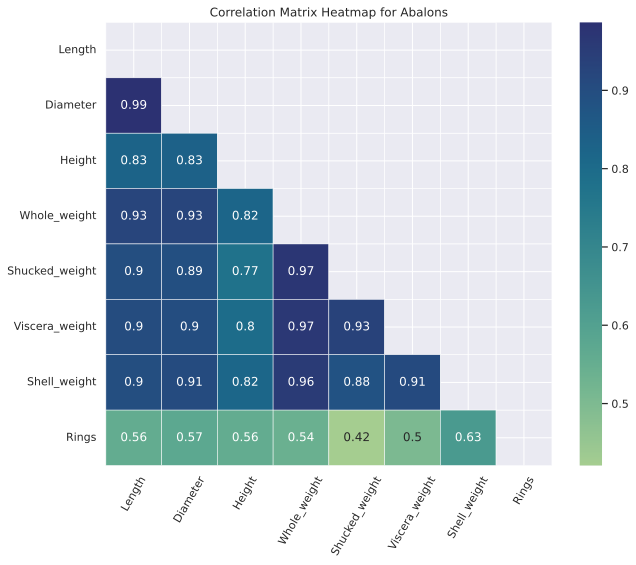

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_1, annot=True, cmap='crest', linewidths=0.5, mask=mask1)
plt.title('Correlation Matrix Heatmap for Abalons')
plt.xticks(rotation=60)
plt.show()

Спостерігаємо впевнену позитивну кореляцію всіх признаків з нашим таргетом 'Rings'

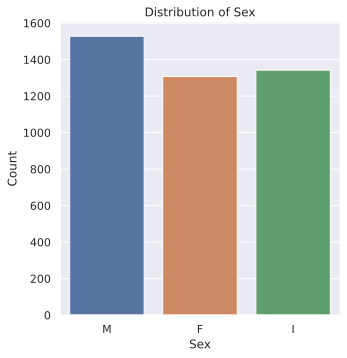

In [ ]:
# Visualize distribution of Sex
sns.catplot(x='Sex', hue='Sex', kind='count', data=abalon_data, legend=False)
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count');

Непоганий баланс класів якщо брати це як таргет для класифікації

## **2. Apply Encoders to Categorical Feature**

### **2.1. LabelEncoder()**

In [ ]:
# Apply LabelEncoder
le_encoder = LabelEncoder()
abalon_data_le = abalon_data.copy()
abalon_data_le['Sex'] = le_encoder.fit_transform(abalon_data_le['Sex'])
abalon_data_le.head(3)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9


### **2.2. Pandas.get_dummies()**

In [ ]:
# Apply get_dummies from Pandas
abalon_data_dummies = pd.get_dummies(abalon_data, columns=['Sex'], drop_first=True)
abalon_data_dummies.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,False,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,False,True
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,False,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,False,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,True,False


### **2.3. OneHotEncoder()**

In [ ]:
# Apply OneHotEncoder
oh_encoder = OneHotEncoder(sparse_output=False)
encoded_sex = oh_encoder.fit_transform(abalon_data[['Sex']])

# Create new dataset with categories as new columns
encoded_sex_ohe = pd.DataFrame(encoded_sex, columns=oh_encoder.get_feature_names_out(['Sex']))

# Concatenate new datset with the initial one
abalon_data_ohe = pd.concat([abalon_data, encoded_sex_ohe], axis=1)

# Drop the 'Sex' column from final dataset
abalon_data_ohe.drop('Sex', axis=1, inplace=True)
abalon_data_ohe.head(3)

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15,0.0,0.0,1.0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7,0.0,0.0,1.0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9,1.0,0.0,0.0


### **2.4. TargetEncoder()**

In [ ]:
# Apply TargetEncoder
target_encoder = TargetEncoder()

# Create new dataset with encoded feature in one column
encoded_sex_target = target_encoder.fit_transform(abalon_data['Sex'], abalon_data['Rings'])

# Copy initial dataset and add new data
abalon_data_target = abalon_data.copy()
abalon_data_target['Sex_Target_Encoded'] = encoded_sex_target
abalon_data_target.drop('Sex', axis=1, inplace=True)
abalon_data_target.head(3)

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_Target_Encoded
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15,10.705497
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7,10.705497
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9,11.129304


### **2.5. CatBoostEncoder()**

In [ ]:
# Apply CatBoost Encoder

# To avoid leakage I will split dataset into train and tes sets
train_data, test_data = train_test_split(abalon_data, test_size=0.2, random_state=42)

# Initialize encoder
catboost_encoder = CatBoostEncoder(cols=['Sex'])

# Fit and transform on the train data and only transform on the test data
train_data['Sex_CatBoost_Encoded'] = catboost_encoder.fit_transform(train_data['Sex'], train_data['Rings'])
test_data['Sex_CatBoost_Encoded'] = catboost_encoder.transform(test_data['Sex'])

# Drop the old column 'Sex'
train_data.drop('Sex', axis=1, inplace=True)
test_data.drop('Sex', axis=1, inplace=True)
train_data.head(3)


,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_CatBoost_Encoded
4038,0.550,0.445,0.125,0.6720,0.2880,0.1365,0.210,11,9.944627
1272,0.475,0.355,0.100,0.5035,0.2535,0.0910,0.140,8,10.472314
3384,0.305,0.225,0.070,0.1485,0.0585,0.0335,0.045,7,9.944627


################## END OF THE NOTEBOOK #######################